In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, TimeSeriesSplit, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler

In [4]:
# Load dataset
df = pd.read_csv('/Users/mustafaaldabbas/Documents/GitHub/Machine_learning_superstore/df_cleaned.csv')

# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Display basic info and summary statistics
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_id               1000 non-null   object        
 1   branch                   1000 non-null   object        
 2   city                     1000 non-null   object        
 3   customer_type            1000 non-null   object        
 4   gender                   1000 non-null   object        
 5   product_line             1000 non-null   object        
 6   unit_price               1000 non-null   float64       
 7   quantity                 1000 non-null   int64         
 8   tax_5                    1000 non-null   float64       
 9   total                    1000 non-null   float64       
 10  date                     1000 non-null   datetime64[ns]
 11  time                     1000 non-null   object        
 12  payment                  1000 non-n

In [5]:
df

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-08-05 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-08-05 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-08-05 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-08-05 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-08-05 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,2024-08-05 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,2024-08-05 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,2024-08-05 13:22:00,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,2024-08-05 15:33:00,Cash,65.82,4.761905,3.2910,4.1


In [6]:
# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract year, month, and day from the date column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


# Aggregate sales data by date
sales_by_date = df.groupby('date')['total'].sum().reset_index()

# Extract year, month, and day from the date column
sales_by_date['year'] = sales_by_date['date'].dt.year
sales_by_date['month'] = sales_by_date['date'].dt.month
sales_by_date['day'] = sales_by_date['date'].dt.day

# Display the first few rows of the aggregated sales data
sales_by_date=pd.DataFrame(sales_by_date)

In [7]:
# Aggregate additional columns by date and city separately
additional_columns = df.groupby(['date', 'branch'])
additional_columns

In [8]:
# Create a new DataFrame with the specified columns
df1 = df[['date', 'unit_price', 'quantity', 'branch', 'rating', 'day', 'month', 'year', 'total']]
# Sort the DataFrame by date in ascending order
df1 = df1.sort_values(by='date')
df1

,date,unit_price,quantity,branch,rating,day,month,year,total
856,2019-01-01,21.12,8,B,6.3,1,1,2019,177.408
567,2019-01-01,65.74,9,A,7.7,1,1,2019,621.243
245,2019-01-01,47.59,8,A,5.7,1,1,2019,399.756
696,2019-01-01,27.04,4,A,6.9,1,1,2019,113.568
523,2019-01-01,62.87,2,C,5.0,1,1,2019,132.027
...,...,...,...,...,...,...,...,...,...
158,2019-03-30,97.22,9,B,6.0,30,3,2019,918.729
881,2019-03-30,10.18,8,C,9.5,30,3,2019,85.512
963,2019-03-30,96.82,3,C,6.7,30,3,2019,304.983
937,2019-03-30,89.48,5,A,7.4,30,3,2019,469.770


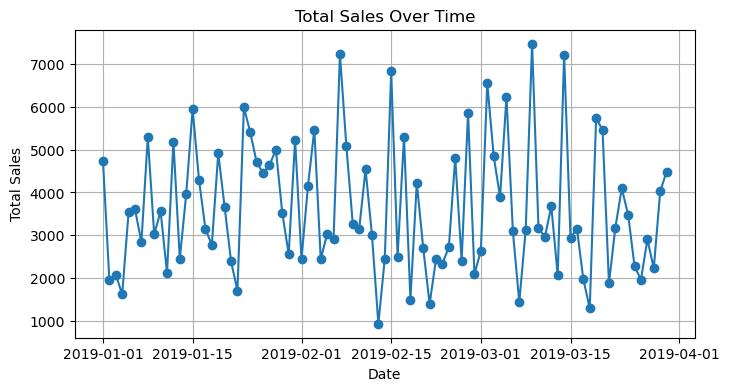

In [9]:
# Plot the total sales over time
plt.figure(figsize=(8, 4))
plt.plot(sales_by_date['date'], sales_by_date['total'], marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

Text(0.5, 0, 'Date')

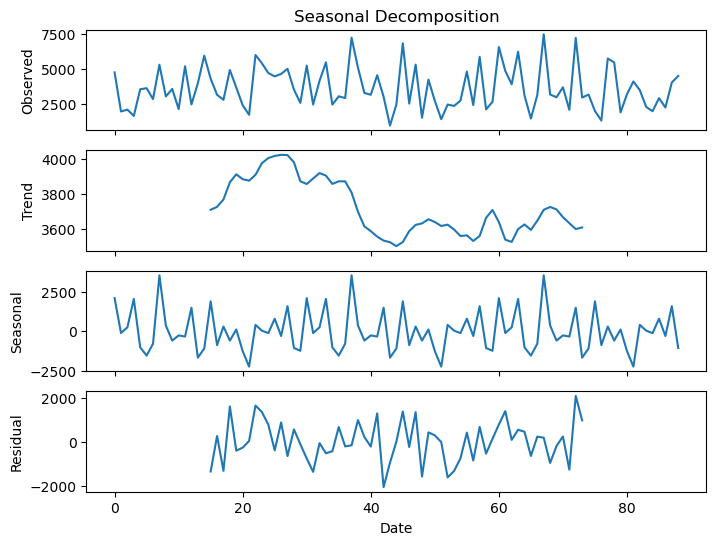

In [10]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_by_date['total'], model='additive', period=30)

# Plot the decomposition results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 6), sharex=True)

ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')
ax1.set_title('Seasonal Decomposition')

ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(decomposition.resid)
ax4.set_ylabel('Residual')
ax4.set_xlabel('Date')

/var/folders/dc/ldz3k5913l3gjmcgcw60g3x80000gp/T/ipykernel_96839/3142198014.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


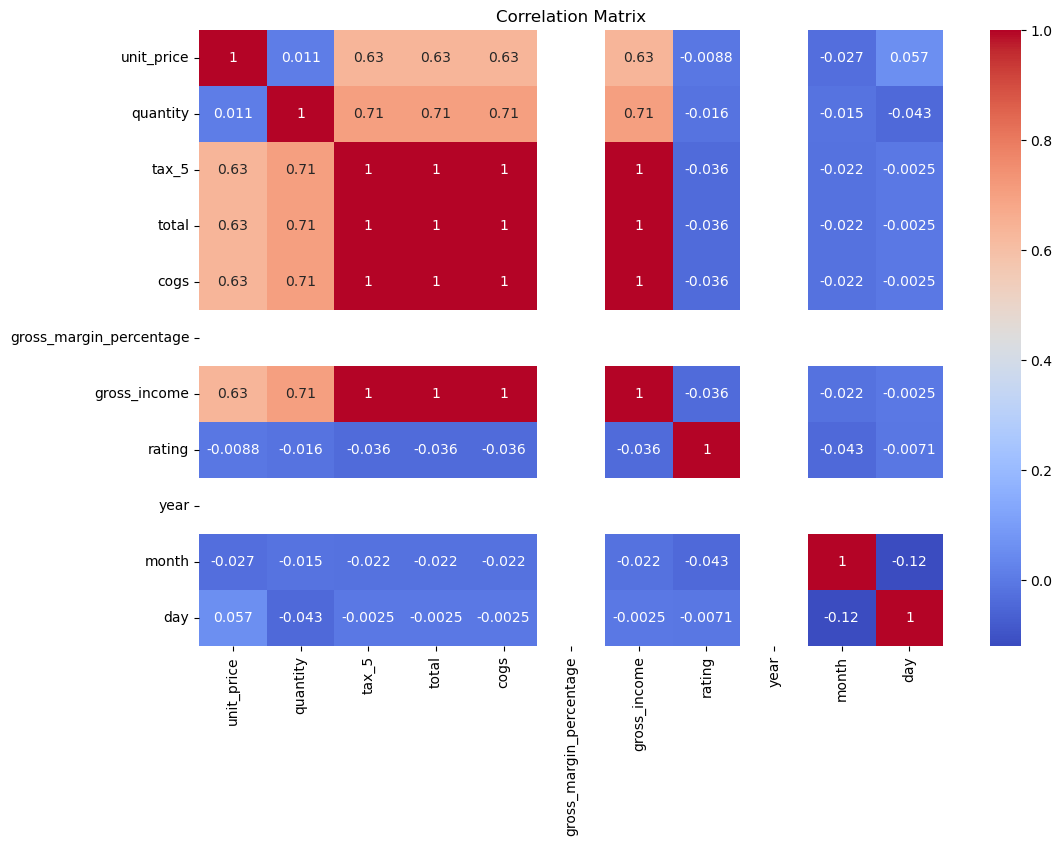

In [11]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
# Encode the branch column
label_encoder = LabelEncoder()
df1['branch_encoded'] = label_encoder.fit_transform(df1['branch'])
df1 = df1.drop(columns=['branch'])
df1

,date,unit_price,quantity,rating,day,month,year,total,branch_encoded
856,2019-01-01,21.12,8,6.3,1,1,2019,177.408,1
567,2019-01-01,65.74,9,7.7,1,1,2019,621.243,0
245,2019-01-01,47.59,8,5.7,1,1,2019,399.756,0
696,2019-01-01,27.04,4,6.9,1,1,2019,113.568,0
523,2019-01-01,62.87,2,5.0,1,1,2019,132.027,2
...,...,...,...,...,...,...,...,...,...
158,2019-03-30,97.22,9,6.0,30,3,2019,918.729,1
881,2019-03-30,10.18,8,9.5,30,3,2019,85.512,2
963,2019-03-30,96.82,3,6.7,30,3,2019,304.983,2
937,2019-03-30,89.48,5,7.4,30,3,2019,469.770,0


In [13]:
# Create separate DataFrames for each branch
branch_a_df = df1[df1['branch_encoded'] == label_encoder.transform(['A'])[0]]
branch_b_df = df1[df1['branch_encoded'] == label_encoder.transform(['B'])[0]]
branch_c_df = df1[df1['branch_encoded'] == label_encoder.transform(['C'])[0]]

In [14]:
# Aggregate data for branch A
branch_a_agg = branch_a_df.groupby('date').agg({
    'unit_price': 'mean',
    'quantity': 'sum',
    'rating': 'mean',
    'day': 'first',
    'month': 'first',
    'year': 'first',
    'total': 'sum'
}).reset_index()

# Aggregate data for branch B
branch_b_agg = branch_b_df.groupby('date').agg({
    'unit_price': 'mean',
    'quantity': 'sum',
    'rating': 'mean',
    'day': 'first',
    'month': 'first',
    'year': 'first',
    'total': 'sum'
}).reset_index()

# Aggregate data for branch C
branch_c_agg = branch_c_df.groupby('date').agg({
    'unit_price': 'mean',
    'quantity': 'sum',
    'rating': 'mean',
    'day': 'first',
    'month': 'first',
    'year': 'first',
    'total': 'sum'
}).reset_index()

In [15]:
branch_a_agg

,date,unit_price,quantity,rating,day,month,year,total
0,2019-01-01,57.440000,37,6.300,1,1,2019,2371.3200
1,2019-01-02,42.065000,7,5.650,2,1,2019,307.0515
2,2019-01-03,53.376667,19,7.500,3,1,2019,937.4085
3,2019-01-04,28.255000,15,7.400,4,1,2019,483.2625
4,2019-01-05,68.974000,27,6.220,5,1,2019,2024.5050
...,...,...,...,...,...,...,...,...
84,2019-03-26,44.758333,25,6.350,26,3,2019,1187.3400
85,2019-03-27,51.612000,22,6.680,27,3,2019,1060.6260
86,2019-03-28,48.140000,35,7.000,28,3,2019,1652.9310
87,2019-03-29,71.900000,13,6.950,29,3,2019,977.6130


In [16]:
branch_b_agg

,date,unit_price,quantity,rating,day,month,year,total
0,2019-01-01,60.153333,24,7.333333,1,1,2019,1536.6960
1,2019-01-02,35.365000,31,6.200000,2,1,2019,1162.8015
2,2019-01-03,72.843333,15,8.533333,3,1,2019,1016.6940
3,2019-01-04,62.433333,8,4.866667,4,1,2019,510.5835
4,2019-01-05,60.180000,11,7.933333,5,1,2019,486.7590
...,...,...,...,...,...,...,...,...
81,2019-03-26,32.373333,13,8.433333,26,3,2019,301.2030
82,2019-03-27,52.632500,14,6.900000,27,3,2019,898.8945
83,2019-03-28,30.370000,3,5.100000,28,3,2019,95.6655
84,2019-03-29,68.947500,27,7.700000,29,3,2019,2059.9320


In [17]:
branch_c_agg

,date,unit_price,quantity,rating,day,month,year,total
0,2019-01-01,48.072500,20,6.375,1,1,2019,837.1650
1,2019-01-02,65.745000,10,6.150,2,1,2019,475.6500
2,2019-01-03,48.500000,3,8.400,3,1,2019,124.0260
3,2019-01-04,66.650000,9,9.700,4,1,2019,629.8425
4,2019-01-05,53.557500,17,8.575,5,1,2019,1025.4195
...,...,...,...,...,...,...,...,...
83,2019-03-26,48.242500,14,5.675,26,3,2019,473.9700
84,2019-03-27,99.820000,9,6.600,27,3,2019,943.2990
85,2019-03-28,45.346667,10,7.800,28,3,2019,480.8055
86,2019-03-29,55.590000,14,5.350,29,3,2019,985.6980


#### 5. Modeling


In [18]:
# Ensure date ordering
branch_a_agg = branch_a_agg.sort_values(by='date')
branch_b_agg = branch_b_agg.sort_values(by='date')
branch_c_agg = branch_c_agg.sort_values(by='date')

In [19]:
# Convert the 'date' columns to datetime
branch_a_agg['date'] = pd.to_datetime(branch_a_agg['date'])
branch_b_agg['date'] = pd.to_datetime(branch_b_agg['date'])
branch_c_agg['date'] = pd.to_datetime(branch_c_agg['date'])

In [20]:
# Define models
models = {
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'KNN': KNeighborsRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'CatBoost': CatBoostRegressor(silent=True)  # silent=True to suppress output during training
}


In [21]:
# Function to prepare data, train and evaluate models
def train_and_evaluate(branch_df, branch_name):
    results = {}
    X = branch_df[['unit_price', 'quantity', 'rating', 'day', 'month', 'year']]
    y = branch_df['total']
    
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    tscv = TimeSeriesSplit(n_splits=5)
    
    for model_name, model in models.items():
        mae_scores = []
        mse_scores = []
        
        for train_index, test_index in tscv.split(X_scaled):
            X_train, X_test = X_scaled[train_index], X_scaled[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            mae_scores.append(mean_absolute_error(y_test, y_pred))
            mse_scores.append(mean_squared_error(y_test, y_pred))
        
        results[model_name] = {
            'MAE': np.mean(mae_scores),
            'MSE': np.mean(mse_scores)
        }
    
    return pd.DataFrame(results).T





In [22]:
# Evaluate models for each branch
branch_a_results = train_and_evaluate(branch_a_agg, 'Branch A')
branch_b_results = train_and_evaluate(branch_b_agg, 'Branch B')
branch_c_results = train_and_evaluate(branch_c_agg, 'Branch C')


In [23]:
# Function to select the best model based on evaluation metrics
def select_best_model(evaluation_results):
    best_model = evaluation_results.loc[evaluation_results['MAE'].idxmin()].name
    return best_model


In [24]:
# Select the best model for each branch
best_model_a_name = select_best_model(branch_a_results)
best_model_b_name = select_best_model(branch_b_results)
best_model_c_name = select_best_model(branch_c_results)


In [25]:
# Initialize the best models based on the selected names
best_model_a = models[best_model_a_name]
best_model_b = models[best_model_b_name]
best_model_c = models[best_model_c_name]
best_model_a, best_model_b, best_model_c

(GradientBoostingRegressor(),
 GradientBoostingRegressor(),
 GradientBoostingRegressor())

In [26]:
# Predict future sales using the best model
def predict_future_sales(branch_df, best_model):
    X = branch_df[['unit_price', 'quantity', 'rating', 'day', 'month', 'year']]
    y = branch_df['total']
    
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Train the best model on the entire dataset
    best_model.fit(X_scaled, y)
    
    # Generate future dates and features
    last_date = branch_df['date'].max()
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7)
    future_features = pd.DataFrame({
        'unit_price': [X['unit_price'].mean()] * 7,  # Assuming mean values; adjust if needed
        'quantity': [X['quantity'].mean()] * 7,
        'rating': [X['rating'].mean()] * 7,
        'day': [d.day for d in future_dates],
        'month': [d.month for d in future_dates],
        'year': [d.year for d in future_dates],
    })
    
    # Standardize future features
    future_features_scaled = scaler.transform(future_features)
    
    # Predict future sales
    future_preds = best_model.predict(future_features_scaled)
    
    return pd.DataFrame({'date': future_dates, 'predicted_total_sales': future_preds})



In [29]:
# Predict future sales for each branch
future_sales_a = predict_future_sales(branch_a_agg, best_model_a)
future_sales_b = predict_future_sales(branch_b_agg, best_model_b)
future_sales_c = predict_future_sales(branch_c_agg, best_model_c)
future_sales_a

,date,predicted_total_sales
0,2019-03-31,1014.500533
1,2019-04-01,1004.481045
2,2019-04-02,995.536676
3,2019-04-03,995.536676
4,2019-04-04,999.344735
5,2019-04-05,999.344735
6,2019-04-06,999.344735


In [30]:
future_sales_b

,date,predicted_total_sales
0,2019-03-31,1314.022019
1,2019-04-01,1363.802599
2,2019-04-02,1347.977048
3,2019-04-03,1338.135171
4,2019-04-04,1345.357697
5,2019-04-05,1345.357697
6,2019-04-06,1345.357697


In [31]:
future_sales_c

,date,predicted_total_sales
0,2019-03-31,1422.206318
1,2019-04-01,1502.364458
2,2019-04-02,1502.364458
3,2019-04-03,1507.430173
4,2019-04-04,1507.430173
5,2019-04-05,1507.430173
6,2019-04-06,1507.430173


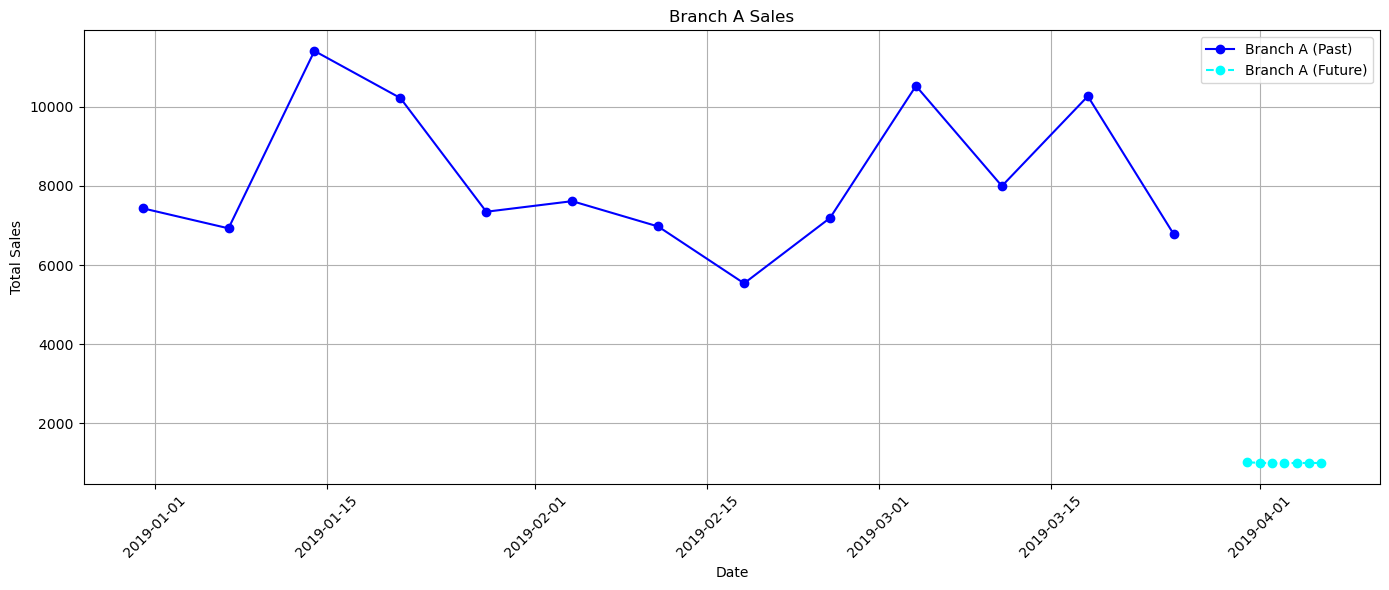

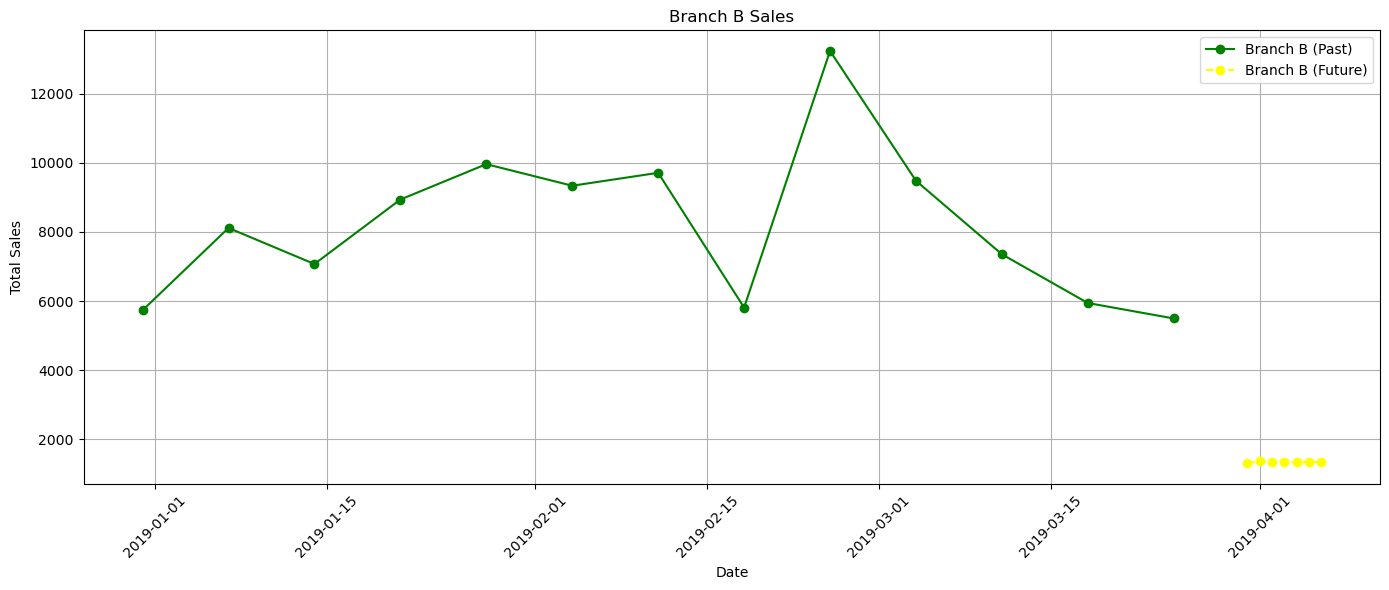

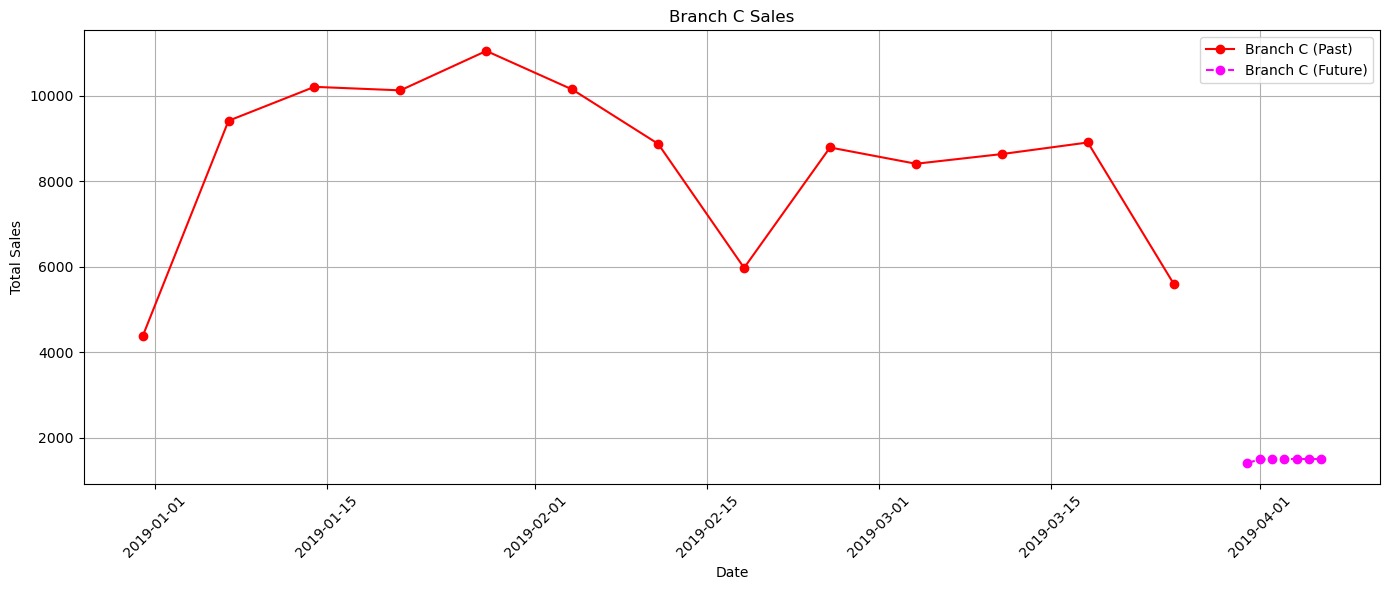

In [28]:
# Combine historical and future data for visualization
def combine_historical_and_future(historical_df, future_df):
    combined_df = pd.concat([historical_df, future_df], ignore_index=True)
    return combined_df

# Prepare historical data
def prepare_historical_data(branch_df):
    branch_df['week'] = branch_df['date'].dt.to_period('W').apply(lambda r: r.start_time)
    historical_data = branch_df.groupby('week')['total'].sum().reset_index()
    historical_data = historical_data.rename(columns={'week': 'date', 'total': 'sales'})
    return historical_data

# Combine historical and future data
combined_sales_a = combine_historical_and_future(prepare_historical_data(branch_a_agg), future_sales_a)
combined_sales_b = combine_historical_and_future(prepare_historical_data(branch_b_agg), future_sales_b)
combined_sales_c = combine_historical_and_future(prepare_historical_data(branch_c_agg), future_sales_c)

# Plot past and future sales for each branch
def plot_past_and_future_sales(combined_sales, branch_name, color_past, color_future):
    plt.figure(figsize=(14, 6))
    
    # Plot historical sales
    historical_sales = combined_sales[combined_sales['date'] <= branch_a_agg['date'].max()]
    future_sales = combined_sales[combined_sales['date'] > branch_a_agg['date'].max()]
    
    plt.plot(historical_sales['date'], historical_sales['sales'], color=color_past, label=f'Branch {branch_name} (Past)', marker='o')
    plt.plot(future_sales['date'], future_sales['predicted_total_sales'], color=color_future, label=f'Branch {branch_name} (Future)', linestyle='--', marker='o')

    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.title(f'Branch {branch_name} Sales')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Visualize the past and future sales for each branch
plot_past_and_future_sales(combined_sales_a, 'A', 'blue', 'cyan')
plot_past_and_future_sales(combined_sales_b, 'B', 'green', 'yellow')
plot_past_and_future_sales(combined_sales_c, 'C', 'red', 'magenta')
